In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [2]:
data=pd.read_csv('weatherAUS.csv')
data.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [3]:
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
data['RainToday'].replace({'No':0,'Yes':1},inplace=True)
data['RainTomorrow'].replace({'No':0,'Yes':1},inplace=True)
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0.0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0.0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0.0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,0.0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.0


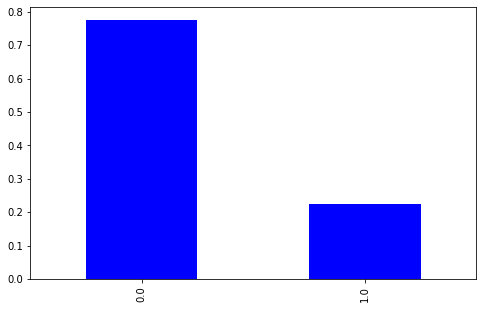

In [6]:
fig=plt.figure(figsize=(8,5))
data.RainTomorrow.value_counts(normalize=True).plot(kind='bar',color='blue')
plt.show()

In [7]:
from imblearn.combine import SMOTETomek
smk=SMOTETomek(random_state=43)
no=data[data['RainTomorrow']==0]
yes=data[data['RainTomorrow']==1]

In [8]:
print(yes.shape,no.shape)

(31877, 23) (110316, 23)


<AxesSubplot:>

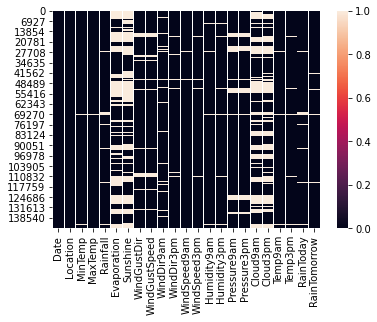

In [9]:
sns.heatmap(data.isnull())

In [10]:
total=data.isnull().sum().sort_values(ascending=False)
percent=(data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
pd.concat([total,percent],axis=1)

,0,1
Sunshine,69835,0.480098
Evaporation,62790,0.431665
Cloud3pm,59358,0.408071
Cloud9am,55888,0.384216
Pressure9am,15065,0.103568
Pressure3pm,15028,0.103314
WindDir9am,10566,0.072639
WindGustDir,10326,0.070989
WindGustSpeed,10263,0.070555
Humidity3pm,4507,0.030984


In [11]:
#oversampling yes
from sklearn.utils import resample
yes_over=resample(yes,replace=True,n_samples=len(no),random_state=123)
data_over=pd.concat([no,yes_over])

In [12]:
data_over.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
133585,2010-06-08,Launceston,1.1,11.8,0.4,NaN,NaN,WNW,13.0,NaN,...,97.0,98.0,1020.1,1013.3,NaN,NaN,4.0,9.5,0.0,1.0
117307,2016-08-08,PearceRAAF,9.6,14.8,11.8,NaN,4.3,W,69.0,WNW,...,85.0,71.0,1015.4,1015.7,8.0,8.0,11.4,12.6,1.0,1.0
87307,2009-03-18,Cairns,24.8,31.5,0.0,5.4,3.4,SE,48.0,SSE,...,63.0,60.0,1008.6,1006.2,5.0,6.0,28.7,30.3,0.0,1.0
56427,2012-08-17,Ballarat,4.2,7.9,11.4,NaN,NaN,SW,63.0,NNW,...,99.0,93.0,997.2,998.9,8.0,8.0,4.6,6.8,1.0,1.0
27220,2009-02-23,Richmond,19.5,31.6,0.2,10.4,NaN,NNW,54.0,NNE,...,76.0,56.0,1016.9,1011.6,NaN,NaN,22.5,31.1,0.0,1.0


In [13]:
data_over.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220632 entries, 0 to 27220
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           220632 non-null  object 
 1   Location       220632 non-null  object 
 2   MinTemp        219550 non-null  float64
 3   MaxTemp        220161 non-null  float64
 4   Rainfall       217508 non-null  float64
 5   Evaporation    125221 non-null  float64
 6   Sunshine       115801 non-null  float64
 7   WindGustDir    205141 non-null  object 
 8   WindGustSpeed  205278 non-null  float64
 9   WindDir9am     205904 non-null  object 
 10  WindDir3pm     214192 non-null  object 
 11  WindSpeed9am   218426 non-null  float64
 12  WindSpeed3pm   216279 non-null  float64
 13  Humidity9am    217461 non-null  float64
 14  Humidity3pm    214601 non-null  float64
 15  Pressure9am    198904 non-null  float64
 16  Pressure3pm    198886 non-null  float64
 17  Cloud9am       139293 non-null

<AxesSubplot:>

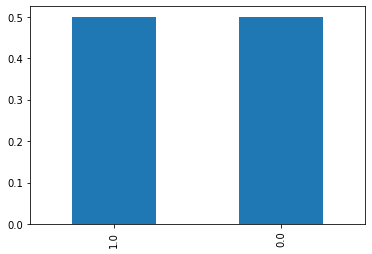

In [14]:
data_over['RainTomorrow'].value_counts(normalize=True).plot(kind='bar')

<AxesSubplot:>

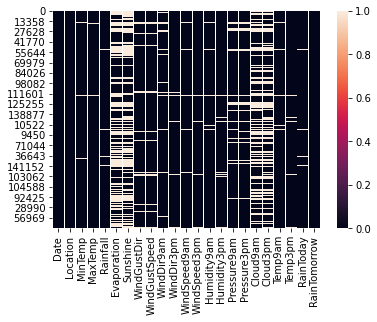

In [15]:
sns.heatmap(data_over.isnull())

In [16]:
data_over.select_dtypes(include=['object']).columns

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], dtype='object')

In [17]:
data_over['WindGustDir']=data_over['WindGustDir'].fillna(data_over['WindGustDir'].mode()[0])
data_over['WindDir9am']=data_over['WindDir9am'].fillna(data_over['WindDir9am'].mode()[0])
data_over['WindDir3pm']=data_over['WindDir3pm'].fillna(data_over['WindDir3pm'].mode()[0])

In [18]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in data_over.select_dtypes(include=['object']).columns:
    data_over[col]=le.fit_transform(data_over[col])

In [19]:
data_over.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,396,2,13.4,22.9,0.6,NaN,NaN,13,44.0,13,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0.0
1,397,2,7.4,25.1,0.0,NaN,NaN,14,44.0,6,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0.0
2,398,2,12.9,25.7,0.0,NaN,NaN,15,46.0,13,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0.0
3,399,2,9.2,28.0,0.0,NaN,NaN,4,24.0,9,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,0.0
4,400,2,17.5,32.3,1.0,NaN,NaN,13,41.0,1,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.0


In [20]:
data_over.shape

(220632, 23)

In [21]:
#missing values
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputed=data_over.copy(deep=True)

In [22]:
impute=IterativeImputer()
imputed.iloc[:,:]=impute.fit_transform(data_over)

c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\sklearn\impute\_iterative.py:669: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


In [23]:
imputed.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,396.0,2.0,13.4,22.9,0.6,5.734653,7.446035,13.0,44.0,13.0,...,71.0,22.0,1007.7,1007.1,8.000000,4.848545,16.9,21.8,0.0,0.0
1,397.0,2.0,7.4,25.1,0.0,5.639329,11.520531,14.0,44.0,6.0,...,44.0,25.0,1010.6,1007.8,1.731945,2.625892,17.2,24.3,0.0,0.0
2,398.0,2.0,12.9,25.7,0.0,7.762688,12.348852,15.0,46.0,13.0,...,38.0,30.0,1007.6,1008.7,1.827673,2.000000,21.0,23.2,0.0,0.0
3,399.0,2.0,9.2,28.0,0.0,5.977293,11.811634,4.0,24.0,9.0,...,45.0,16.0,1017.6,1012.8,1.233996,2.116194,18.1,26.5,0.0,0.0
4,400.0,2.0,17.5,32.3,1.0,6.852837,5.728406,13.0,41.0,1.0,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.0,0.0


In [24]:
imputed.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [25]:
#Detecting Outliers
q1=imputed.quantile(0.25)
q3=imputed.quantile(0.75)
iqr=q3-q1

In [26]:
print(iqr)

Date             1535.000000
Location           25.000000
MinTemp             9.300000
MaxTemp            10.200000
Rainfall            2.400000
Evaporation         4.120044
Sunshine            5.979485
WindGustDir         9.000000
WindGustSpeed      19.000000
WindDir9am          8.000000
WindDir3pm          8.000000
WindSpeed9am       13.000000
WindSpeed3pm       11.000000
Humidity9am        26.000000
Humidity3pm        30.000000
Pressure9am         8.800000
Pressure3pm         8.800000
Cloud9am            4.000000
Cloud3pm            3.684676
Temp9am             9.300000
Temp3pm             9.800000
RainToday           1.000000
RainTomorrow        1.000000
dtype: float64


In [27]:
#remove outliers from dataset
cut_off=1.5*iqr
lower=q1-cut_off
upper=q3+cut_off

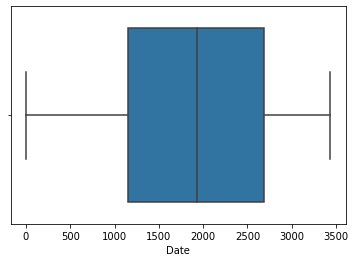

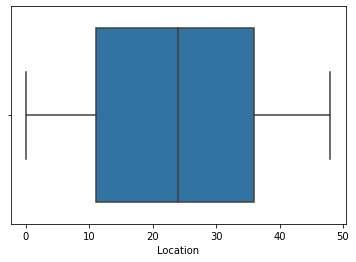

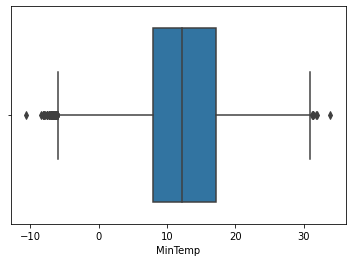

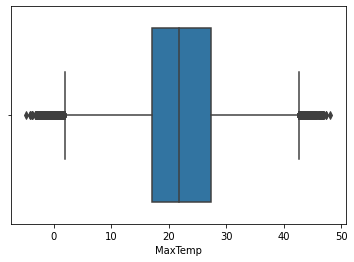

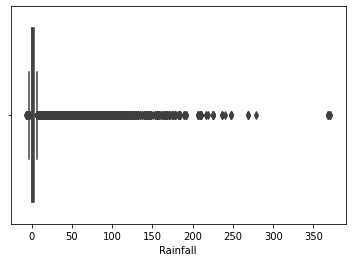

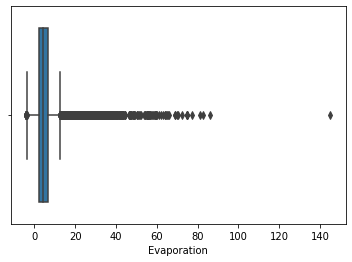

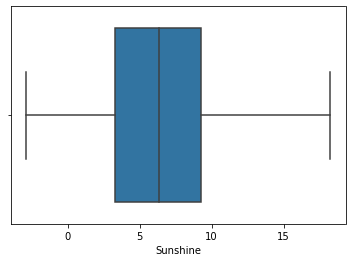

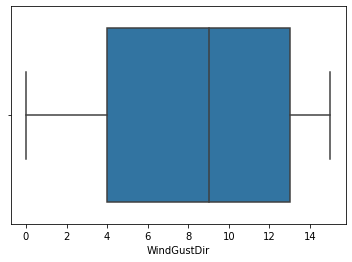

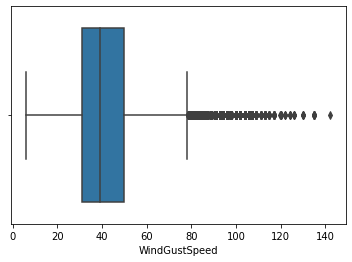

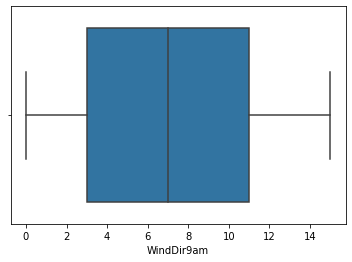

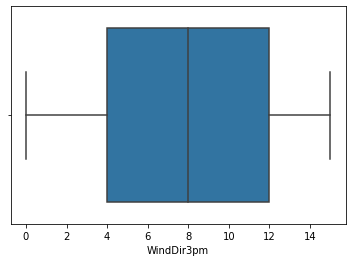

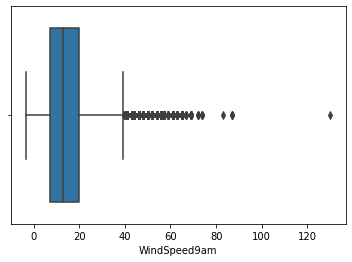

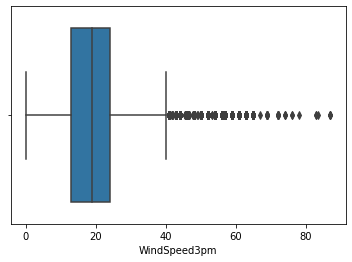

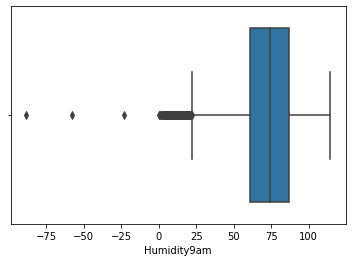

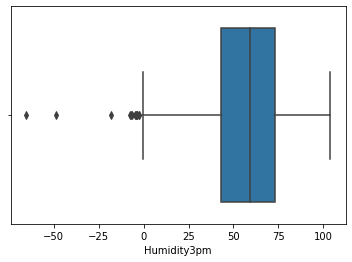

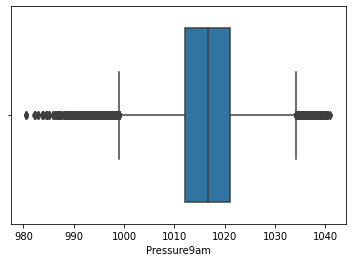

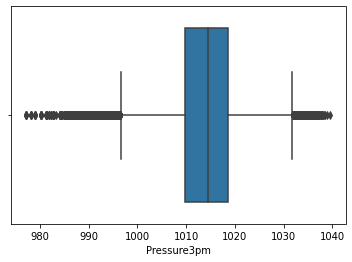

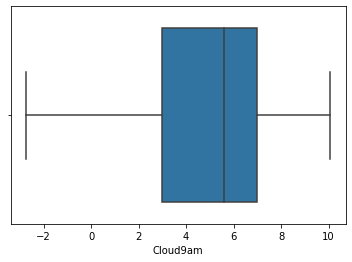

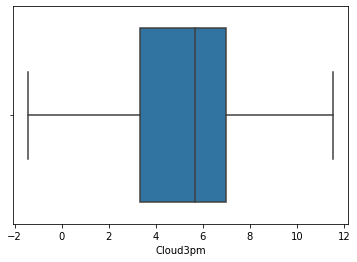

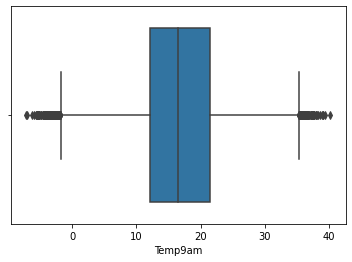

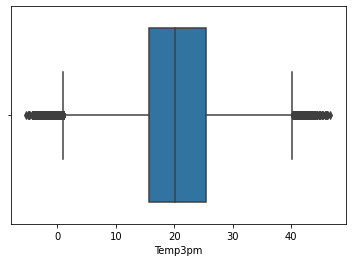

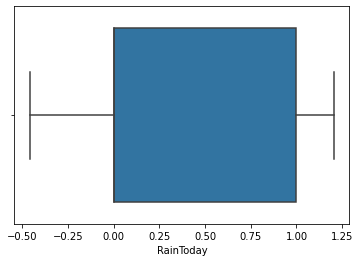

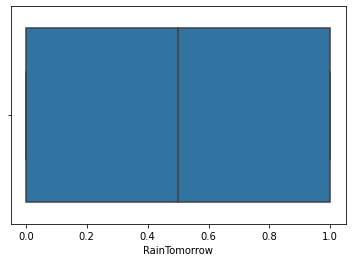

In [28]:
for col in imputed.columns:
    sns.boxplot(imputed[col])
    plt.show()

In [29]:
print(imputed<(lower)| (imputed>(upper)))

         Date  Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0       False     False    False    False      True        False     False   
1       False     False    False    False      True        False     False   
2       False     False    False    False      True        False     False   
3       False     False    False    False      True        False     False   
4       False     False    False    False     False        False     False   
...       ...       ...      ...      ...       ...          ...       ...   
133585  False     False    False    False      True         True      True   
117307  False     False    False    False     False        False     False   
87307   False     False    False    False      True        False     False   
56427   False     False    False    False     False         True      True   
27220   False     False    False    False      True        False     False   

        WindGustDir  WindGustSpeed  WindDir9am  ...  Humidity9a

In [30]:
imp=imputed.copy(deep=True)

In [31]:
imp=imputed[~((imputed<(lower))|(imputed>(upper))).any(axis=1)]

In [32]:
imp.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,396.0,2.0,13.4,22.9,0.6,5.734653,7.446035,13.0,44.0,13.0,...,71.0,22.0,1007.7,1007.1,8.000000,4.848545,16.9,21.8,0.0,0.0
1,397.0,2.0,7.4,25.1,0.0,5.639329,11.520531,14.0,44.0,6.0,...,44.0,25.0,1010.6,1007.8,1.731945,2.625892,17.2,24.3,0.0,0.0
2,398.0,2.0,12.9,25.7,0.0,7.762688,12.348852,15.0,46.0,13.0,...,38.0,30.0,1007.6,1008.7,1.827673,2.000000,21.0,23.2,0.0,0.0
3,399.0,2.0,9.2,28.0,0.0,5.977293,11.811634,4.0,24.0,9.0,...,45.0,16.0,1017.6,1012.8,1.233996,2.116194,18.1,26.5,0.0,0.0
4,400.0,2.0,17.5,32.3,1.0,6.852837,5.728406,13.0,41.0,1.0,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.0,0.0


In [33]:
print(imp.shape)
print(imputed.shape)

(170669, 23)
(220632, 23)


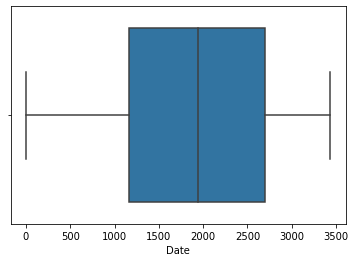

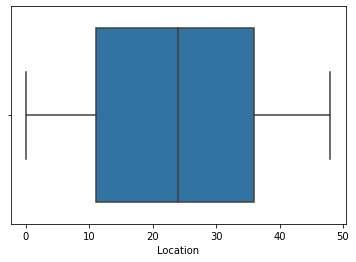

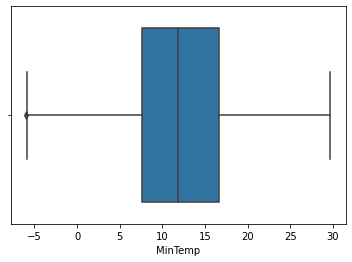

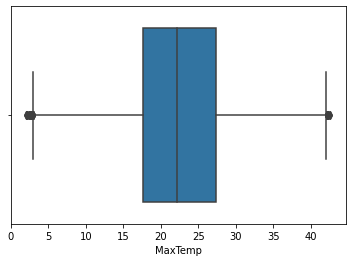

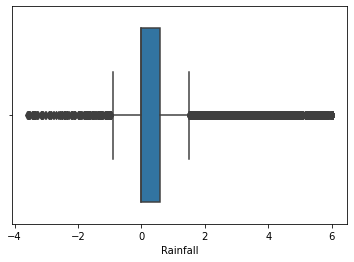

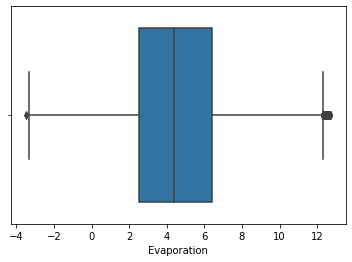

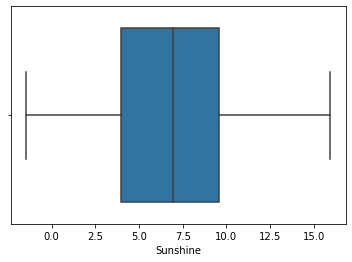

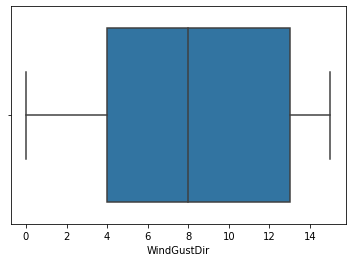

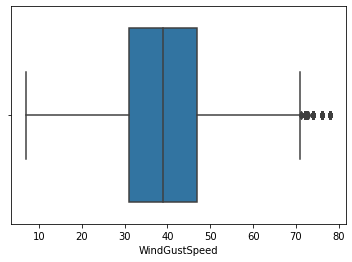

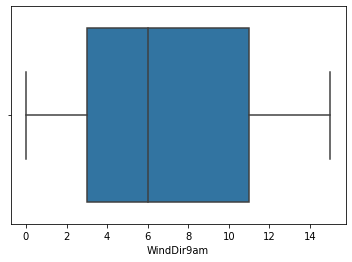

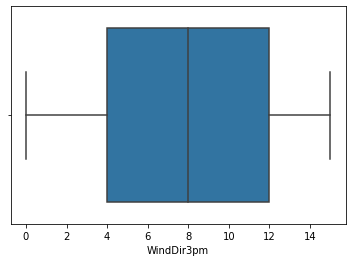

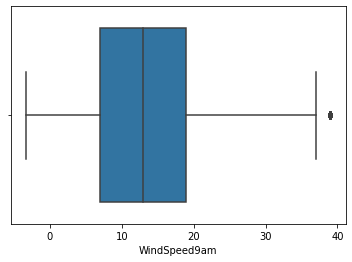

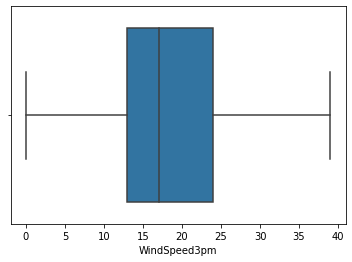

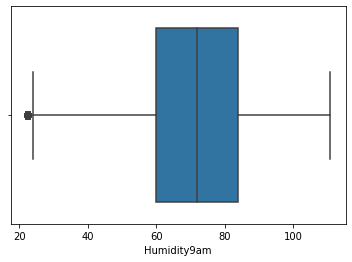

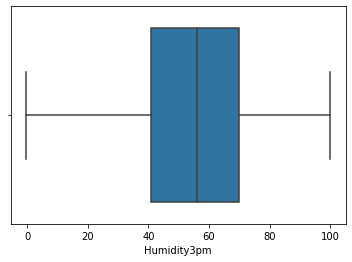

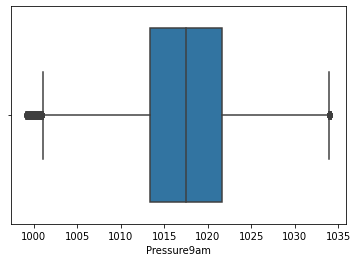

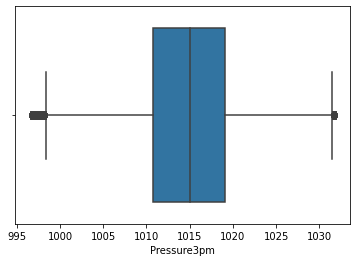

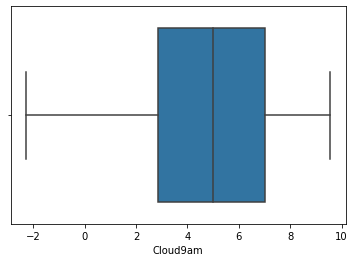

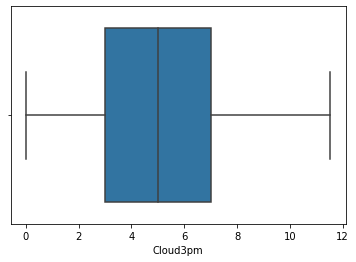

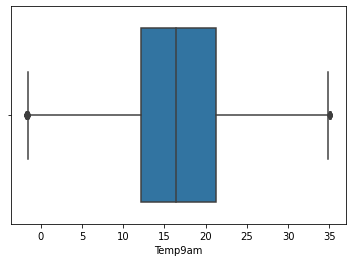

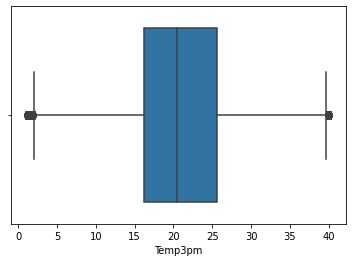

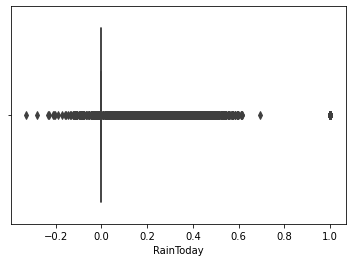

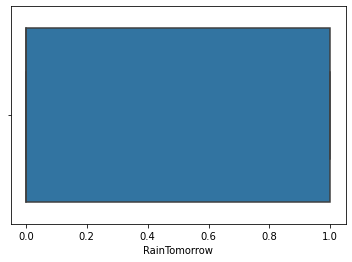

In [34]:
for col in imp.columns:
    sns.boxplot(imp[col])
    plt.show()

In [35]:
#Feature Selection
from sklearn.preprocessing import MinMaxScaler
ssl=MinMaxScaler()
ssl.fit(imp)
df2=pd.DataFrame(ssl.transform(imp), index=imp.index, columns=imp.columns)

In [36]:
df2.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0.115284,0.041667,0.543417,0.514778,0.437385,0.569756,0.512042,0.866667,0.521127,0.866667,...,0.551807,0.222773,0.245714,0.298295,0.868449,0.420458,0.506775,0.530612,0.24783,0.0
1,0.115575,0.041667,0.375350,0.568966,0.374872,0.563868,0.745836,0.933333,0.521127,0.400000,...,0.247750,0.252666,0.328571,0.318182,0.339380,0.227713,0.514905,0.594388,0.24783,0.0
2,0.115866,0.041667,0.529412,0.583744,0.374872,0.695026,0.793365,1.000000,0.549296,0.866667,...,0.180182,0.302488,0.242857,0.343750,0.347461,0.173437,0.617886,0.566327,0.24783,0.0
3,0.116157,0.041667,0.425770,0.640394,0.374872,0.584743,0.762539,0.266667,0.239437,0.600000,...,0.259012,0.162986,0.528571,0.460227,0.297350,0.183513,0.539295,0.650510,0.24783,0.0
4,0.116448,0.041667,0.658263,0.746305,0.479060,0.638825,0.413485,0.866667,0.478873,0.066667,...,0.675683,0.332382,0.334286,0.267045,0.784042,0.693747,0.531165,0.732143,0.24783,0.0


In [37]:
X=df2.loc[:,df2.columns!='RainTomorrow']
y=df2[['RainTomorrow']]

In [38]:
from sklearn.feature_selection import SelectKBest,chi2
chi_features=SelectKBest(chi2,k=10)
chi_features.fit(X,y)
X2=chi_features.transform(X)

In [39]:
print(X.shape)
print(X2.shape)

(170669, 22)
(170669, 10)


In [40]:
chi_features.get_support()

array([False, False, False, False,  True, False,  True, False,  True,
       False, False, False, False,  True,  True,  True,  True,  True,
        True, False, False,  True])

In [41]:
selected_feat=X.columns[chi_features.get_support()]

In [42]:
selected_feat

Index(['Rainfall', 'Sunshine', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'RainToday'],
      dtype='object')

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [44]:
sel=SelectFromModel(RandomForestClassifier(n_estimators=100))

In [45]:
sel.fit(X,y)

c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\sklearn\feature_selection\_from_model.py:224: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


SelectFromModel(estimator=RandomForestClassifier())

In [46]:
sel.get_support()

array([False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True, False, False, False])

In [47]:
rsel_feat=X.columns[sel.get_support()]

In [48]:
print(rsel_feat)
print(selected_feat)

Index(['Sunshine', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am',
       'Cloud3pm'],
      dtype='object')
Index(['Rainfall', 'Sunshine', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'RainToday'],
      dtype='object')


In [49]:
features=df2[['WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Sunshine','Temp9am','RainToday']]
target=df2['RainTomorrow']

In [50]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(features,target)

In [51]:
rf=RandomForestClassifier(n_estimators=100)

In [52]:
print(x_train.shape)
print(x_test.shape)

(128001, 10)
(42668, 10)


In [53]:
rf.fit(x_train,y_train)
rfl=rf.predict(x_test)

In [54]:
from sklearn.metrics import f1_score,confusion_matrix

In [55]:
print(f1_score(rfl,y_test))

0.9510047296767619


In [57]:
import xgboost as xgb

In [58]:
model_xgb=xgb.XGBClassifier()

In [59]:
model_xgb.fit(x_train,y_train)

c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:59:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [63]:
xgbs=model_xgb.predict(x_test)

In [64]:
f1_score(xgbs,y_test)

0.8468391571085623

In [70]:
from mlxtend.plotting import plot_decision_regions

In [71]:
rf.fit(x_train,y_train)

RandomForestClassifier()

ValueError: Number of features of the model must match the input. Model n_features is 10 and input n_features is 2 

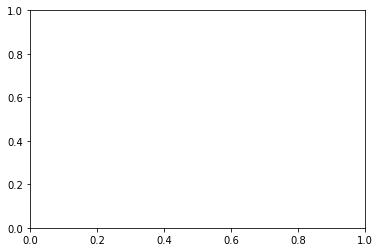

In [77]:
Xs=df2[['Sunshine','Humidity9am']]
ys=df2['RainTomorrow']
Xp=np.asarray(Xs,dtype=np.float32)
yp=np.asarray(ys,dtype=np.int32)
plot_decision_regions(X=Xp,y=yp,clf=rf,legend=2)
plt.show()